## ws_sp_toolbox.ipynb
### run experiments with SP's toolbox
### WESmith 05/07/20

In [167]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
import toolbox as tb
import pyphi
import numpy as np
import pandas as pd

In [168]:
def get_net(ledges, nodes, funcs, title=''):
    # wrapper for SP tools
    i, j = zip(*ledges)
    indexLUT = dict([(l,ord(l)-ord(nodes[0])) for l in sorted(set(i+j))])
    edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
    net = tb.Net(edges=edges, title=title)
    for j,k in zip(nodes, funcs):
        net.get_node(j).func = k
    return net

In [169]:
def get_phi(perm):
    try:
        return net.phi(perm)
    except:
        return -1 # state isn't reachable

In [170]:
# example used in Mayner documents
edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B')]
nodes = ['A', 'B', 'C']
funcs = [tb.or_func, tb.and_func, tb.xor_func]

In [171]:
net = get_net(edges, nodes, funcs)

edges=[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)] n_list=[0, 1, 2]


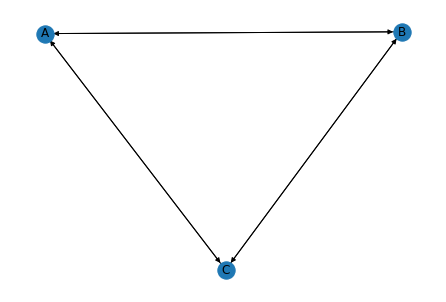

In [172]:
net.draw()

In [173]:
print(nx.info(net.graph))

Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 6
Average in degree:   2.0000
Average out degree:   2.0000


In [175]:
df=net.tpm
df

,A,B,C
000,0,0,0
100,0,0,1
010,1,0,1
110,1,0,0
001,1,0,0
101,1,1,1
011,1,0,1
111,1,1,0


- above table agrees with slide 39 of pcbi.1006343.s001.pdf

---

In [176]:
print(f"Probability distributions: {dict([(l,net.node_pd(net.get_node(l))) for l in nodes])}")

Probability distributions: {'A': [0.25, 0.75], 'B': [0.75, 0.25], 'C': [0.5, 0.5]}


- interpretation: from above table, A is on 75% of the time, B is on 25% of the time, C is on 50% of the time
- this consistent with output

---

In [177]:
for k in nodes:
    print('{1}, {0}'.format(net.get_node(k), net.node_state_counts(net.get_node(k))))

Counter({1: 3, 0: 1}), A(0): 2,or_func
Counter({0: 3, 1: 1}), B(1): 2,and_func
Counter({0: 2, 1: 2}), C(2): 2,xor_func


- above are truth tables for each node: how many times 0 shows, how many times 1 shows
- eg: first one is 'or': 0 shows once, 1 shows three times

---

In [178]:
state = (0,1,1)
out = [net.eval_node(net.get_node(k), state) for k in nodes]
out

[1, 0, 1]

- this evaluates the output at t+1 for the node when system state is as given at t
- above example reproduces one row of the TPM

---

In [179]:
net.phi('100')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0]


1.916665

- this phi agrees with phi from slide 227 of above-referenced pdf

---

In [180]:
# make histogram of phi over alls states
# need helper function because of try:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0]


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

Calculating Φ at state=[1, 0, 0]


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

Calculating Φ at state=[0, 1, 0]
Calculating Φ at state=[1, 1, 0]


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

Calculating Φ at state=[0, 0, 1]


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

Calculating Φ at state=[1, 0, 1]


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

Calculating Φ at state=[0, 1, 1]
Calculating Φ at state=[1, 1, 1]


In [181]:
dd

[('000', 0.666668),
 ('100', 1.916665),
 ('010', -1),
 ('110', 0.25),
 ('001', 0.25),
 ('101', 1.816667),
 ('011', -1),
 ('111', 0.666668)]

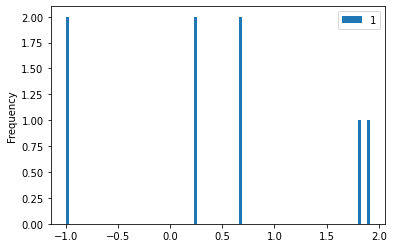

In [182]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100)

---

## EXPERIMENT 001:  Two identical 3-node systems, bidirectionally coupled at an XOR node

In [183]:
edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B'),
          ('D', 'E'), ('D', 'F'), 
          ('E', 'D'), ('E', 'F'), 
          ('F', 'D'), ('F', 'E'),
          ('C', 'F'), ('F', 'C')  # xor's are bidirectionally coupled
         ]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
funcs = [tb.or_func, tb.and_func, tb.xor_func, tb.or_func, tb.and_func, tb.xor_func]

edges=[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4), (2, 5), (5, 2)] n_list=[0, 1, 2, 3, 4, 5]


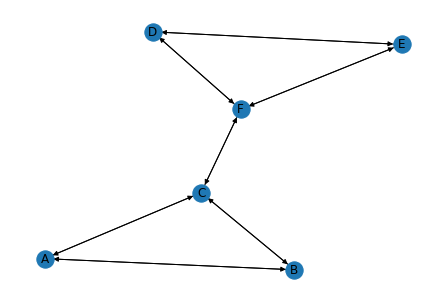

In [184]:
net = get_net(edges, nodes, funcs)
net.draw()

In [185]:
print(nx.info(net.graph))

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 14
Average in degree:   2.3333
Average out degree:   2.3333


In [186]:
df=net.tpm
df

,A,B,C,D,E,F
000000,0,0,0,0,0,0
100000,0,0,1,0,0,0
010000,1,0,1,0,0,0
110000,1,0,0,0,0,0
001000,1,0,0,0,0,1
...,...,...,...,...,...,...
110111,1,0,1,1,1,0
001111,1,0,1,1,1,1
101111,1,1,0,1,1,1
011111,1,0,0,1,1,1


In [187]:
print(f"Probability distributions: {dict([(l,net.node_pd(net.get_node(l))) for l in nodes])}")

Probability distributions: {'A': [0.25, 0.75], 'B': [0.75, 0.25], 'C': [0.5, 0.5], 'D': [0.25, 0.75], 'E': [0.75, 0.25], 'F': [0.5, 0.5]}


In [188]:
for k in nodes:
    print('{1}, {0}'.format(net.get_node(k), net.node_state_counts(net.get_node(k))))

Counter({1: 3, 0: 1}), A(0): 2,or_func
Counter({0: 3, 1: 1}), B(1): 2,and_func
Counter({0: 4, 1: 4}), C(2): 2,xor_func
Counter({1: 3, 0: 1}), D(3): 2,or_func
Counter({0: 3, 1: 1}), E(4): 2,and_func
Counter({0: 4, 1: 4}), F(5): 2,xor_func


In [189]:
# make histogram of phi over alls states
# need helper function because of try:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 0, 0, 0]
Calculating Φ at state=[1, 1, 0, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 0, 0, 0]
Calculating Φ at state=[1, 1, 1, 0, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 0, 1, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 1, 0, 0]
Calculating Φ at state=[1, 1, 0, 1, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 1, 0, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1, 0, 0]
Calculating Φ at state=[1, 1, 1, 1, 0, 0]


Calculating Φ at state=[0, 0, 0, 0, 1, 0]
Calculating Φ at state=[1, 0, 0, 0, 1, 0]
Calculating Φ at state=[0, 1, 0, 0, 1, 0]
Calculating Φ at state=[1, 1, 0, 0, 1, 0]
Calculating Φ at state=[0, 0, 1, 0, 1, 0]
Calculating Φ at state=[1, 0, 1, 0, 1, 0]
Calculating Φ at state=[0, 1, 1, 0, 1, 0]
Calculating Φ at state=[1, 1, 1, 0, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 1, 1, 0]
Calculating Φ at state=[1, 1, 0, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1, 1, 0]
Calculating Φ at state=[1, 1, 1, 1, 1, 0]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 0, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 0, 0, 1]
Calculating Φ at state=[1, 1, 0, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 0, 0, 1]
Calculating Φ at state=[1, 1, 1, 0, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 0, 1, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 1, 0, 1]
Calculating Φ at state=[1, 1, 0, 1, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 1, 0, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1, 0, 1]
Calculating Φ at state=[1, 1, 1, 1, 0, 1]


Calculating Φ at state=[0, 0, 0, 0, 1, 1]
Calculating Φ at state=[1, 0, 0, 0, 1, 1]
Calculating Φ at state=[0, 1, 0, 0, 1, 1]
Calculating Φ at state=[1, 1, 0, 0, 1, 1]
Calculating Φ at state=[0, 0, 1, 0, 1, 1]
Calculating Φ at state=[1, 0, 1, 0, 1, 1]
Calculating Φ at state=[0, 1, 1, 0, 1, 1]
Calculating Φ at state=[1, 1, 1, 0, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 1, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 1, 1, 1]
Calculating Φ at state=[1, 1, 0, 1, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 1, 1, 1]


Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1, 1, 1]
Calculating Φ at state=[1, 1, 1, 1, 1, 1]


In [190]:
dd

[('000000', 0.666665),
 ('100000', 2.673609),
 ('010000', -1),
 ('110000', 0.25),
 ('001000', 0.25),
 ('101000', 2.673609),
 ('011000', -1),
 ('111000', 0.666665),
 ('000100', 2.673609),
 ('100100', 8.082926),
 ('010100', -1),
 ('110100', 0.472222),
 ('001100', 0.472222),
 ('101100', 8.145427),
 ('011100', -1),
 ('111100', 2.673609),
 ('000010', -1),
 ('100010', -1),
 ('010010', -1),
 ('110010', -1),
 ('001010', -1),
 ('101010', -1),
 ('011010', -1),
 ('111010', -1),
 ('000110', 0.25),
 ('100110', 0.472222),
 ('010110', -1),
 ('110110', 0.25),
 ('001110', 0.25),
 ('101110', 0.472222),
 ('011110', -1),
 ('111110', 0.25),
 ('000001', 0.25),
 ('100001', 0.472222),
 ('010001', -1),
 ('110001', 0.25),
 ('001001', 0.25),
 ('101001', 0.472222),
 ('011001', -1),
 ('111001', 0.25),
 ('000101', 2.673609),
 ('100101', 8.145427),
 ('010101', -1),
 ('110101', 0.472222),
 ('001101', 0.472222),
 ('101101', 8.082926),
 ('011101', -1),
 ('111101', 2.673609),
 ('000011', -1),
 ('100011', -1),
 ('010011'

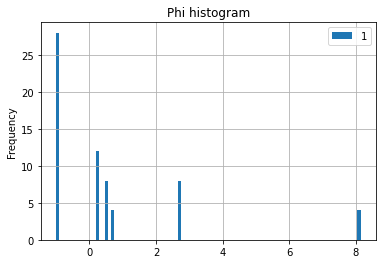

In [199]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---

## EXPERIMENT 002: Two identical 3-node systems, uncoupled

In [207]:
edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B'),
          ('D', 'E'), ('D', 'F'), 
          ('E', 'D'), ('E', 'F'), 
          ('F', 'D'), ('F', 'E'),
         ]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
funcs = [tb.or_func, tb.and_func, tb.xor_func, tb.or_func, tb.and_func, tb.xor_func]

edges=[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4)] n_list=[0, 1, 2, 3, 4, 5]


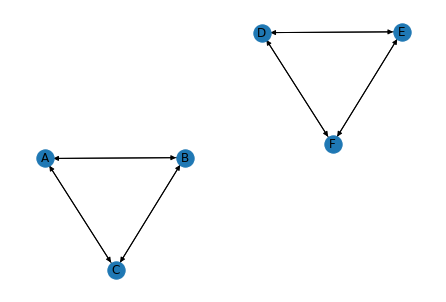

In [208]:
net = get_net(edges, nodes, funcs)
net.draw()

In [209]:
df=net.tpm
df

,A,B,C,D,E,F
000000,0,0,0,0,0,0
100000,0,0,1,0,0,0
010000,1,0,1,0,0,0
110000,1,0,0,0,0,0
001000,1,0,0,0,0,0
...,...,...,...,...,...,...
110111,1,0,0,1,1,0
001111,1,0,0,1,1,0
101111,1,1,1,1,1,0
011111,1,0,1,1,1,0


In [205]:
dd = [(k, get_phi(k)) for k in df.index]

Calculating Φ at state=[0, 0, 0, 0, 0, 0]
Calculating Φ at state=[1, 0, 0, 0, 0, 0]
Calculating Φ at state=[0, 1, 0, 0, 0, 0]
Calculating Φ at state=[1, 1, 0, 0, 0, 0]
Calculating Φ at state=[0, 0, 1, 0, 0, 0]
Calculating Φ at state=[1, 0, 1, 0, 0, 0]
Calculating Φ at state=[0, 1, 1, 0, 0, 0]
Calculating Φ at state=[1, 1, 1, 0, 0, 0]
Calculating Φ at state=[0, 0, 0, 1, 0, 0]
Calculating Φ at state=[1, 0, 0, 1, 0, 0]
Calculating Φ at state=[0, 1, 0, 1, 0, 0]
Calculating Φ at state=[1, 1, 0, 1, 0, 0]
Calculating Φ at state=[0, 0, 1, 1, 0, 0]
Calculating Φ at state=[1, 0, 1, 1, 0, 0]
Calculating Φ at state=[0, 1, 1, 1, 0, 0]
Calculating Φ at state=[1, 1, 1, 1, 0, 0]
Calculating Φ at state=[0, 0, 0, 0, 1, 0]
Calculating Φ at state=[1, 0, 0, 0, 1, 0]
Calculating Φ at state=[0, 1, 0, 0, 1, 0]
Calculating Φ at state=[1, 1, 0, 0, 1, 0]
Calculating Φ at state=[0, 0, 1, 0, 1, 0]
Calculating Φ at state=[1, 0, 1, 0, 1, 0]
Calculating Φ at state=[0, 1, 1, 0, 1, 0]
Calculating Φ at state=[1, 1, 1, 0

In [206]:
dd

[('000000', 0.0),
 ('100000', 0.0),
 ('010000', -1),
 ('110000', 0.0),
 ('001000', 0.0),
 ('101000', 0.0),
 ('011000', -1),
 ('111000', 0.0),
 ('000100', 0.0),
 ('100100', 0.0),
 ('010100', -1),
 ('110100', 0.0),
 ('001100', 0.0),
 ('101100', 0.0),
 ('011100', -1),
 ('111100', 0.0),
 ('000010', -1),
 ('100010', -1),
 ('010010', -1),
 ('110010', -1),
 ('001010', -1),
 ('101010', -1),
 ('011010', -1),
 ('111010', -1),
 ('000110', 0.0),
 ('100110', 0.0),
 ('010110', -1),
 ('110110', 0.0),
 ('001110', 0.0),
 ('101110', 0.0),
 ('011110', -1),
 ('111110', 0.0),
 ('000001', 0.0),
 ('100001', 0.0),
 ('010001', -1),
 ('110001', 0.0),
 ('001001', 0.0),
 ('101001', 0.0),
 ('011001', -1),
 ('111001', 0.0),
 ('000101', 0.0),
 ('100101', 0.0),
 ('010101', -1),
 ('110101', 0.0),
 ('001101', 0.0),
 ('101101', 0.0),
 ('011101', -1),
 ('111101', 0.0),
 ('000011', -1),
 ('100011', -1),
 ('010011', -1),
 ('110011', -1),
 ('001011', -1),
 ('101011', -1),
 ('011011', -1),
 ('111011', -1),
 ('000111', 0.0),


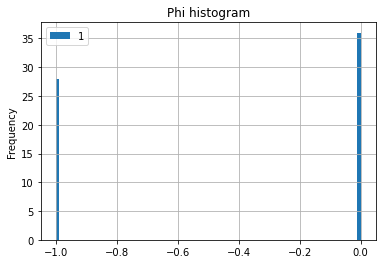

In [210]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---

## EXPERIMENT 003: Four XOR gates, fully bidirectionally coupled

In [211]:
edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]

edges=[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)] n_list=[0, 1, 2, 3]


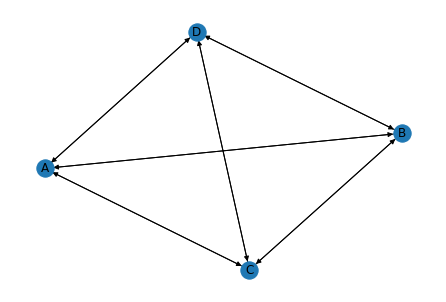

In [212]:
net = get_net(edges, nodes, funcs)
net.draw()

In [218]:
df=net.tpm
df

,A,B,C,D
0000,0,0,0,0
1000,0,1,1,1
0100,1,0,1,1
1100,1,1,0,0
0010,1,1,0,1
1010,1,0,1,0
0110,0,1,1,0
1110,0,0,0,1
0001,1,1,1,0
1001,1,0,0,1


In [215]:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 1, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 1, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 1, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 1, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 1, 1, 1]


In [216]:
dd

[('0000', 5.5),
 ('1000', 5.5),
 ('0100', 5.5),
 ('1100', 5.5),
 ('0010', 5.5),
 ('1010', 5.5),
 ('0110', 5.5),
 ('1110', 5.5),
 ('0001', 5.5),
 ('1001', 5.5),
 ('0101', 5.5),
 ('1101', 5.5),
 ('0011', 5.5),
 ('1011', 5.5),
 ('0111', 5.5),
 ('1111', 5.5)]

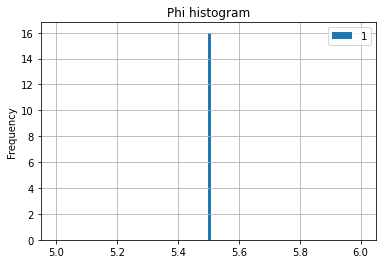

In [217]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---

## EXPERIMENT 004: Four XOR gates, removing one bidirectional link

In [221]:
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]

edges=[(0, 2), (0, 3), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)] n_list=[0, 1, 2, 3]


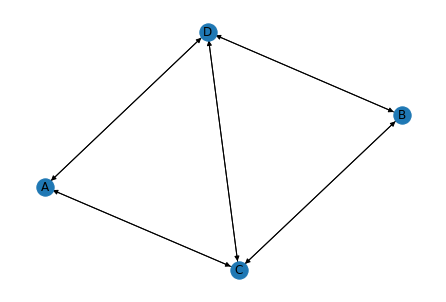

In [222]:
net = get_net(edges, nodes, funcs)
net.draw()

In [225]:
df=net.tpm

In [226]:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 0]
Calculating Φ at state=[0, 1, 0, 0]
Calculating Φ at state=[1, 1, 0, 0]
Calculating Φ at state=[0, 0, 1, 0]
Calculating Φ at state=[1, 0, 1, 0]
Calculating Φ at state=[0, 1, 1, 0]
Calculating Φ at state=[1, 1, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 0, 1]
Calculating Φ at state=[1, 0, 0, 1]
Calculating Φ at state=[0, 1, 0, 1]
Calculating Φ at state=[1, 1, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1]


Calculating Φ at state=[1, 0, 1, 1]
Calculating Φ at state=[0, 1, 1, 1]
Calculating Φ at state=[1, 1, 1, 1]


In [228]:
dd

[('0000', 0.25),
 ('1000', -1),
 ('0100', -1),
 ('1100', -1),
 ('0010', -1),
 ('1010', -1),
 ('0110', -1),
 ('1110', 0.25),
 ('0001', -1),
 ('1001', -1),
 ('0101', -1),
 ('1101', 0.25),
 ('0011', 0.25),
 ('1011', -1),
 ('0111', -1),
 ('1111', -1)]

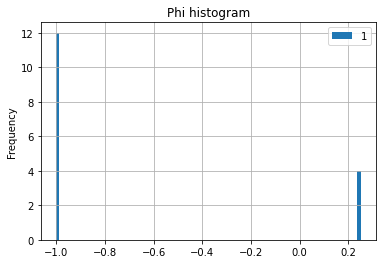

In [227]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---

## EXPERIMENT 005: Four XOR gates, removing two bidirectional links

In [229]:
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]

edges=[(0, 2), (0, 3), (1, 2), (1, 3), (2, 0), (2, 1), (3, 0), (3, 1)] n_list=[0, 1, 2, 3]


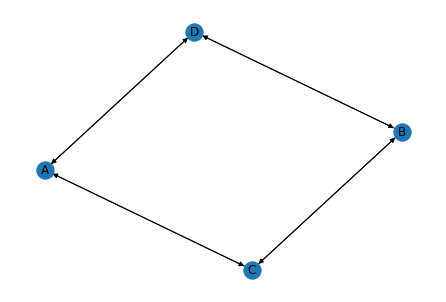

In [230]:
net = get_net(edges, nodes, funcs)
net.draw()

In [231]:
df=net.tpm

In [232]:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0]


Calculating Φ at state=[1, 0, 0, 0]
Calculating Φ at state=[0, 1, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[1, 1, 0, 0]


Calculating Φ at state=[0, 0, 1, 0]
Calculating Φ at state=[1, 0, 1, 0]
Calculating Φ at state=[0, 1, 1, 0]
Calculating Φ at state=[1, 1, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 1]
Calculating Φ at state=[1, 0, 0, 1]
Calculating Φ at state=[0, 1, 0, 1]
Calculating Φ at state=[1, 1, 0, 1]
Calculating Φ at state=[0, 0, 1, 1]


Calculating Φ at state=[1, 0, 1, 1]
Calculating Φ at state=[0, 1, 1, 1]

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]


Calculating Φ at state=[1, 1, 1, 1]


In [233]:
dd

[('0000', 0.0),
 ('1000', -1),
 ('0100', -1),
 ('1100', 0.0),
 ('0010', -1),
 ('1010', -1),
 ('0110', -1),
 ('1110', -1),
 ('0001', -1),
 ('1001', -1),
 ('0101', -1),
 ('1101', -1),
 ('0011', 0.0),
 ('1011', -1),
 ('0111', -1),
 ('1111', 0.0)]

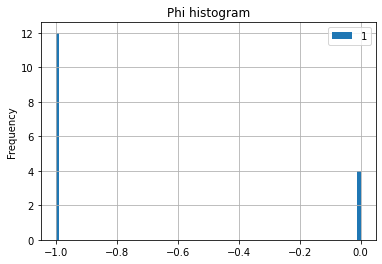

In [234]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---

## EXPERIMENT 006: Four XOR gates, removing one DIRECTIONAL link

In [235]:
edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]

edges=[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1)] n_list=[0, 1, 2, 3]


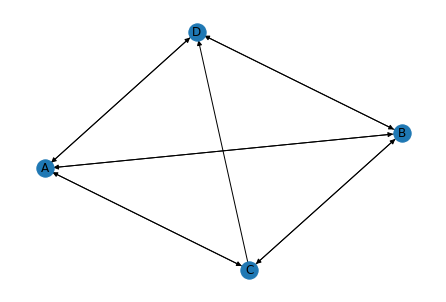

In [236]:
net = get_net(edges, nodes, funcs)
net.draw()

In [238]:
df=net.tpm

In [239]:
dd = [(k, get_phi(k)) for k in df.index]

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 0]
Calculating Φ at state=[0, 1, 0, 0]
Calculating Φ at state=[1, 1, 0, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 0]
Calculating Φ at state=[1, 0, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 0]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 1, 1, 0]
Calculating Φ at state=[0, 0, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[1, 0, 0, 1]
Calculating Φ at state=[0, 1, 0, 1]
Calculating Φ at state=[1, 1, 0, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 0, 1, 1]
Calculating Φ at state=[1, 0, 1, 1]


Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]         

Calculating Φ at state=[0, 1, 1, 1]


Calculating Φ at state=[1, 1, 1, 1]


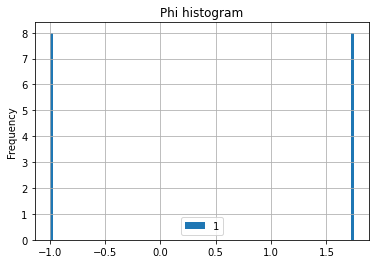

In [240]:
dff = pd.DataFrame(dd)
ax = dff.plot.hist(bins=100, grid=True, title='Phi histogram')

---